In [1]:
import pandas as pd
import numpy as np
from doc_bd import Manage_db
import json
import os
import mysql.connector
from mysql.connector import errorcode
import re
import urllib3 
import time
import warnings
warnings.filterwarnings('ignore')
urllib3.disable_warnings()
import matplotlib.pyplot as plt
from pymongo import MongoClient
#import sklearn

In [2]:
sql = Manage_db(database = 'lop2test', host = 'localhost', user='root', password='')

client = MongoClient("localhost", 27017)
db = client['lop2test']
submissions_lop = db['submissions']

#df_class.loc[df['id_class'] == 'f2dd7bef-5b5d-4cb3-9efa-aa8652af0605']
id_class = 'e378c59f-e815-4a41-95fc-e95e4432a34c'
#pd_data = pd.DataFrame([id_class], columns = ['id_class'])
condition = "WHERE class_id = 'e378c59f-e815-4a41-95fc-e95e4432a34c'"
df_submission = sql.search(table='submission')
list_quest_subm = df_submission.drop(['ip', 'id', 'environment','hitPercentage','timeConsuming','createdAt','type','language', 'answer', 'char_change_number', 'user_id', 'lesson_id', 'class_id', 'test_id'], axis=1).drop_duplicates()
df_submission_class = sql.search(table='submission', condition=condition)
df_lop_lists = sql.search(table='listQuestions')

df_lop_tests = sql.search(table='test')

df_class = sql.search(table='class')
df_quest = sql.search(table='question')

users_class = sql.search(table='classHasUser')
tag = sql.search(table='tag')
quest_tag = sql.search(table='questionHasTag')
df_list_q = sql.search(table='listHasQuestion')

In [3]:
tag.columns.values[0] ='tag_id'
list_class = df_submission_class['listQuestions_id'].drop_duplicates().reset_index(name='id')
a = df_lop_lists.columns.tolist()
df_list_class = pd.DataFrame(columns = a)

for i in range(list_class.count().values[0]):
    for a in range(df_lop_lists.count().values[0]):
        if list_class['id'][i] == df_lop_lists['id'][a]:
            b = dict(df_lop_lists.loc[a])
            df_list_class = df_list_class.append(b, ignore_index=True)
df_list_class.columns.values[0] = 'listQuestions_id'

test_class = df_submission_class['test_id'].drop_duplicates().reset_index(name='id')
a = df_lop_tests.columns.tolist()
df_test_class = pd.DataFrame(columns = a)

for i in range(test_class.count().values[0]):
    for a in range(df_lop_tests.count().values[0]):
        if test_class['id'][i] == df_lop_tests['id'][a]:
            b = dict(df_lop_tests.loc[a])
            df_test_class = df_test_class.append(b, ignore_index=True)
df_test_class.columns.values[0] = 'test_id'

quest_class = df_submission_class['question_id'].drop_duplicates().reset_index(name='id')
a = df_quest.columns.tolist()
df_quest_class = pd.DataFrame(columns = a)

for i in range(quest_class.count().values[0]):
    for a in range(df_quest.count().values[0]):
        if quest_class['id'][i] == df_quest['id'][a]:
            b = dict(df_quest.loc[a])
            df_quest_class = df_quest_class.append(b, ignore_index=True)
df_quest_class.columns.values[0] = 'question_id'

#verificando o total de questoes cadastrados em listas da turma 
list_name = df_list_class['listQuestions_id'].tolist()
a = df_list_q.columns.tolist()
df_q_l = pd.DataFrame(columns = a)

for i in range(df_list_class.count().values[0]):
    for a in range(df_list_q.count().values[0]):
        if df_list_class['listQuestions_id'][i] == df_list_q['list_id'][a]:
            b = dict(df_list_q.loc[a])
            df_q_l = df_q_l.append(b, ignore_index=True)

subs =[]
for x in submissions_lop.find():
    subs.append(x)
df_class_lop = pd.DataFrame(subs)

In [4]:
list_class = df_class_lop['listQuestions_id'].drop_duplicates().reset_index(name='id')
a = df_lop_lists.columns.tolist()
df_list_lop = pd.DataFrame(columns = a)

for i in range(list_class.count().values[0]):
    for a in range(df_lop_lists.count().values[0]):
        if list_class['id'][i] == df_lop_lists['id'][a]:
            b = dict(df_lop_lists.loc[a])
            df_list_lop = df_list_lop.append(b, ignore_index=True)
df_list_lop.columns.values[0] = 'listQuestions_id'
df_list_lop

,listQuestions_id,title,code,createdAt,updatedAt,author_id
0,9338cc7b-7cf4-4d9f-af63-25a7effa7189,(Lop) Estruturas de decisão - Múltiplas decisões,358922cf78,2020-03-23 16:07:21,2020-09-15 00:03:03,1a3aa181-9fc6-41e1-b61a-febd18f4eb23
1,dd1cd083-6c00-4605-9ff1-163bd4069363,Repetição condicional - Lista Resolvida (LOP),f00e8a3272,2020-06-24 11:44:44,2020-06-24 13:30:49,2985b749-e081-400c-b2cc-97ae042a777d
2,aca84206-87b2-4478-afa4-6193119cc06a,Repetição condicional - Lista de Exercícios (LOP),0814ea8f94,2020-06-29 12:19:48,2020-06-29 12:19:48,2985b749-e081-400c-b2cc-97ae042a777d
3,c6f3f5e5-0b0c-4396-92ba-d22d4125f555,Laboratório 01 - Expressões Aritméticas,d0947edaac,2020-02-28 14:49:23,2020-02-28 14:49:23,1a3aa181-9fc6-41e1-b61a-febd18f4eb23
4,813dedaa-0989-489b-9804-3850ae4b83d1,Repetição contada - Lista Prática (LOP),73a86e8081,2020-07-07 11:56:51,2020-07-07 11:56:51,02673ba8-1fcb-4cb0-9cf3-a789cab48731
5,f5bc770d-2ac7-4060-ab1c-e42b5541f7a7,Repetição contada - Lista de Exercícios (LOP),7a2e23fcb3,2020-07-07 11:59:39,2020-07-07 11:59:39,02673ba8-1fcb-4cb0-9cf3-a789cab48731
6,5ebe517f-50f2-4629-a22f-1dea895fce25,Aula - Funções Aritméticas,4749406f21,2020-03-04 21:55:18,2020-03-04 21:55:18,1a3aa181-9fc6-41e1-b61a-febd18f4eb23
7,1551e3ed-c875-4bb3-8e4e-58407df40776,Vetores - Lista de Exercícios (LOP),309289819d,2020-07-16 17:37:42,2020-07-16 17:37:42,6a36fa60-665f-4d15-a9de-0a523b93ca71
8,cf509a46-6a97-440e-a5c0-f7ba7537ef96,(Lop) Estruturas de decisão - problemas sobre ...,5c2cb0df7d,2020-04-08 01:15:40,2020-04-08 01:15:40,None
9,e1f0e8be-54fe-4b54-8d6d-2451bedc0647,Treinamento - Expressões Aritméticas,87add2f05c,2020-03-06 16:09:41,2020-03-06 16:09:41,1a3aa181-9fc6-41e1-b61a-febd18f4eb23


In [5]:
#aprovados - acima da media
#submissoes da turma

#retirando da df_class_lop todas as turmas do 2020.1
l_classes = df_class_lop['class_id'].drop_duplicates().tolist()
nclasses = []
nclasses.append(l_classes[0])
nclasses.append(l_classes[5])
nclasses.append(l_classes[8])

df_class_lop = df_class_lop.drop( df_class_lop[df_class_lop['class_id']==nclasses[0]].index )
df_class_lop = df_class_lop.drop( df_class_lop[df_class_lop['class_id']==nclasses[1]].index )
df_class_lop = df_class_lop.drop( df_class_lop[df_class_lop['class_id']==nclasses[2]].index )

df_performance = df_class_lop.groupby(['class_id', 'user_id', 'listQuestions_id','question_id'])['hitPercentage'].max().reset_index()
#soma das notas por lista
df_performance = df_performance.groupby(['class_id', 'user_id','listQuestions_id'])['hitPercentage'].sum().reset_index()
#Me traz as porcentagens maximas de acerto por questão
df_performance = df_class_lop.groupby(['class_id', 'user_id','listQuestions_id','question_id'])['hitPercentage'].max().reset_index()
      #Soma as porcentagens de uma lista/prova unica
df_performance = df_performance.groupby(['class_id', 'user_id','listQuestions_id'])['hitPercentage'].sum().reset_index()
      #Renomeando para melhorar entendimento
df_performance.rename(columns={'hitPercentage':'totalHitPercentage'}, inplace = True)
#Listas cadastradas nessa turma
lists = df_class_lop['listQuestions_id'].drop_duplicates().values
#Lista de alunos
df_without_duplicates = df_class_lop.drop_duplicates(subset=['class_id', 'user_id'])
    #df_without_duplicates = df_without_duplicates[['user_id']]
df_prov = pd.DataFrame()
for lista in lists:
    df_users = df_without_duplicates.copy()
    df_users['listQuestions_id'] = lista
    df_prov = df_prov.append(df_users)
    #df_prov.loc[df_prov['user_id']=='Flávio']
df_performance = pd.merge(df_performance,df_prov, on=['class_id', 'user_id','listQuestions_id'], how='outer')#.fillna(0)  
    #df_question_data = df_quest.groupby(['listQuestions_id','question_id'])['id_list'].count().reset_index()
      #Conta quantas questões tem por lista
df_question_data = list_quest_subm.groupby(['listQuestions_id'])['question_id'].count().reset_index(name='totalQuestionslist')
      #Merge
df_performance = df_performance.merge(df_question_data, on = 'listQuestions_id')
    #Média de acerto por lista
df_performance['medialist'] = df_performance['totalHitPercentage'] / df_performance['totalQuestionslist']
      #Convertendo para datetime
df_lop_lists['createdAt'] = pd.to_datetime(df_lop_lists['createdAt'])
      #Criando campo com a data
df_lop_lists['dateList'] = df_lop_lists['createdAt'].dt.date
      #Merge
lists_df = df_list_lop
lists_df.columns.values[0] = 'listQuestions_id'

df_performance = pd.merge(df_performance, lists_df.drop(columns = ['createdAt']), on='listQuestions_id')
    #graph1
    #Número de alunos na turma
#total_students = df_class_lop.drop(['_id','timeInSecounds','question_id', 'listQuestions_id', 'id','environment','timeConsuming','createdAt','char_change_number', 'test_id', 'language', 'hitPercentage', 'ip', 'type', 'answer', 'lesson_id'], axis=1).drop_duplicates()
#total_students = total_students.groupby(['class_id'])['user_id'].count()
#total_students = total_students['user_id'].count()

    #Media por lista por cada turma
#df_mean_list = (df_performance.groupby(['listQuestions_id'])['medialist'].sum() / total_students).reset_index(name='mediaListClass')
#newDf = pd.merge(df_performance, df_mean_list,on=['listQuestions_id']).sort_values(by=['user_id']).drop(columns = ['mediaListClass','totalHitPercentage', 'listQuestions_id', 'totalQuestionslist']).fillna(0)
    #newDf.loc[newDf['user_id']=='Alexandre Leonardo']
newDf = df_performance
newDf = newDf.groupby(['user_id', 'class_id'])['medialist'].sum().reset_index()
newDf['medialist'] = newDf['medialist'] / lists_df.count().values[0]
    #newDf
    #newDf[newDf['medialist']>=50].values[0]
    #newDf['medialist'].values[0]
    #for a in range(newDf.count().values[0]):
    #    if newDf['medialist'].values[a]>=50:
    #        b=b+1
    #b
newDf['aprovado'] = 2
for a in range(newDf.count().values[0]):
    if newDf['medialist'].values[a]>=50:
        newDf['aprovado'][a]=1
    else:
        newDf['aprovado'][a]=0
newDf[newDf['aprovado']==1]

,user_id,class_id,medialist,aprovado
1,01e8e5bd-3215-4276-9024-5ebc5a6897cf,f7144f91-f493-4e55-aac5-39f0d4add995,57.357704,1
2,025b0056-585f-485e-92e7-57a0c7854cce,8f055c33-00ad-4284-aec8-da401901e795,50.177404,1
5,0343690d-9edd-48cf-be09-6dc1f4b3f61c,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,56.126984,1
6,035bbeb6-140b-413c-826d-9f92e36a31ae,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,58.984127,1
8,047eb461-ce62-4eb4-bf0f-edea350f4873,8f055c33-00ad-4284-aec8-da401901e795,58.984127,1
...,...,...,...,...
473,f69adfc6-de1e-406d-bd3d-9edf2e562ac8,e9c7c378-eac4-44b2-b687-4dca6d77cd54,57.188043,1
477,f7817f2f-cd2e-424a-b085-0411dc4aa1d5,8f055c33-00ad-4284-aec8-da401901e795,56.154995,1
479,fb10ec34-7cf7-4ca7-910b-0cec1331b2b3,8f055c33-00ad-4284-aec8-da401901e795,58.984127,1
485,fe3c3b36-a1ab-4365-b088-1686cd5177d0,d99923f0-d174-4902-9759-c8220b821d36,54.240896,1


In [58]:
#tem algo aqui dando erro
df_class_lop_t = df_class_lop.sort_values('createdAt')
name_class = df_class_lop_t['class_id'].iloc[0]
one_class = df_class_lop_t[df_class_lop_t['class_id']==name_class]
order_lists = one_class['listQuestions_id'].drop_duplicates().tolist()
users = one_class['user_id'].drop_duplicates().tolist()
usersp = one_class.groupby(['user_id'])['listQuestions_id'].count().reset_index(name='ateLista')
usersp['user_id']=users
usersp['ateLista'] = 0

#for x in range(len(users)):
#    a=len(order_lists)
#    while a!=0:
#        one_studt = one_class[one_class['user_id']==users[x]]
#        qtd_subm = one_studt[one_studt['listQuestions_id']==order_lists[a-1]]
#        qtd_subm = qtd_subm.count().values[0]
#        if qtd_subm == 0:
#            a=a-1
#        else:
#            usersp['ateLista'][x] = (a)
#            break
#usersp

#z = ['user_id','l1', 'l2','l3','l4','l5','l6','l7','l8','l9','l10','l11','l12','l13','l14','l15','l16']
#listas_f = pd.DataFrame(columns = z)

#one_studt = one_class[one_class['user_id']==users[0]]
#list_a = one_studt['listQuestions_id'].drop_duplicates().tolist()
#teste = []
#b = len(list_a)-1
#for x in range(len(order_lists)):
#    for a in range(len(list_a)):
#        if order_lists[x] == list_a[a]:
#            teste.append(1)
#            break
#        elif a==b:
#            teste.append(0)
#teste
    #one_studt['listQuestions_id'].drop_duplicates().tolist()
    #te = df_class_lop_t[df_class_lop_t['user_id']=='05c35721-051a-43fa-96b7-aeec0d0eafb5']
    #te['listQuestions_id'].drop_duplicates().tolist()
    
    
lista_ate = []
for x in range(len(users)):
    one_studt = one_class[one_class['user_id']==users[x]]
    qtd_ate_l0 = one_studt['listQuestions_id'].drop_duplicates().tolist()
#    qtd_ate_l = qtd_ate_l0[len(qtd_ate_l0)-1]
    maior = 0
    for x in range(len(qtd_ate_l0)):
        for z in range(len(order_lists)):
            if qtd_ate_l0[x] == order_lists[z]:
                if maior < z:
                    maior = z
    lista_ate.append(maior)
#te = one_class[one_class['user_id']==usersp['user_id'].iloc[5]]
#te = te['listQuestions_id'].drop_duplicates()
#te = te.count()
#te
usersp['ateLista']=lista_ate

a = one_class[one_class['user_id']=='00ef5626-f029-49e8-aa27-1839357a55c0']
qtd_ate_l0 = a['listQuestions_id'].drop_duplicates().tolist()
qtd_ate_l = qtd_ate_l0[len(qtd_ate_l0)-1]
maior = 0
for x in range(len(qtd_ate_l0)):
    for z in range(len(order_lists)):
        if qtd_ate_l0[x] == order_lists[z]:
            if maior < z:
                maior = z
print(maior)
#usersp
usersp

#teste = one_class[one_class['user_id']=='00ef5626-f029-49e8-aa27-1839357a55c0']
#teste['listQuestions_id'].drop_duplicates()
#order_lists

1


,user_id,ateLista
0,337cb03d-871a-4e38-8ab1-f79f8a0d8807,15
1,ab916ff5-180e-401f-a1ff-de548e2d584d,15
2,dc04e57b-43e7-448a-8f4c-1b29fc696a8e,15
3,716464a3-83d7-41f6-afcd-bd5a77644c7f,15
4,00ef5626-f029-49e8-aa27-1839357a55c0,1
...,...,...
85,1afdd554-892d-4746-81ab-76809311b711,15
86,f4e5c666-288b-4bbf-951b-56fd0fbb7f9f,15
87,bbf405b0-63d5-4031-9e5c-f4914a92c1dc,15
88,81c20d34-5d22-472d-8aac-7a215ce8296a,15


In [7]:
qtd_ateLista = usersp.groupby(['ateLista'])['user_id'].count().reset_index(name='totalDeAlunosAteLista')
qtd_ateLista
#os alunos que estao cituados na lista 17 a fizeram e os que estão na 15, somente fizeram ate a 15, mas nao fizeram a 17. 
#aparentemente, somente os alunos que fizeram a questao 16, foram alguns ques submeteram na lista 17; mesma coisa pra lista 6 e 12

,ateLista,totalDeAlunosAteLista
0,0,1
1,1,1
2,2,1
3,3,1
4,14,2
5,15,84


In [8]:
qtd_totalAteLista = qtd_ateLista
for x in range(len(qtd_totalAteLista)):
    qtd_totalAteLista['totalDeAlunosAteLista'][x+1]= qtd_totalAteLista['totalDeAlunosAteLista'][x] + qtd_totalAteLista['totalDeAlunosAteLista'][x+1]
    if x==len(qtd_totalAteLista)-2:
        break
qtd_totalAteLista
#apagar ultima linha

,ateLista,totalDeAlunosAteLista
0,0,1
1,1,2
2,2,3
3,3,4
4,14,6
5,15,90


In [9]:
#talvez alguns alunos desistam nas ultimas listas por ja terem passado/aprendido e podem acharem que nao precisam a fazer
#verificar se ate em que momento há aluno que não submete nas ultimas e acaba passando
#quando houver um numero maior de reprovados que aprovados, para aqueles que somente fizeram ate tal lista: marcar até este periodo

In [10]:
aprovados1 = newDf[newDf['class_id']==name_class]
usersAteApr = pd.merge(aprovados1,usersp, on=['user_id'], how='outer')
usersAteApr

,user_id,class_id,medialist,aprovado,ateLista
0,00ef5626-f029-49e8-aa27-1839357a55c0,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,8.000000,0,1
1,0343690d-9edd-48cf-be09-6dc1f4b3f61c,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,56.126984,1,15
2,035bbeb6-140b-413c-826d-9f92e36a31ae,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,58.984127,1,15
3,04a9f776-feee-4b63-8127-50270693e39f,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,58.984127,1,15
4,05c35721-051a-43fa-96b7-aeec0d0eafb5,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,56.126984,1,15
...,...,...,...,...,...
85,e8af96e7-0bac-45ff-a498-f22acb1af407,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,58.984127,1,15
86,ed3e0097-1441-41df-9e12-671039749c8e,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,8.333333,0,2
87,f4e5c666-288b-4bbf-951b-56fd0fbb7f9f,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,58.984127,1,15
88,f5874924-7ed6-421c-ac14-3c0bccf51c24,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,37.333333,0,15


In [55]:
aprovs = usersAteApr[usersAteApr['aprovado']==1]
aprAlista = aprovs.groupby(['ateLista'])['aprovado'].count().reset_index(name='totalDeAprAteLista')
aprAlista

,ateLista,totalDeAprAteLista
0,14,1
1,15,51


In [56]:
ate_Lista = usersp.groupby(['ateLista'])['user_id'].count().reset_index(name='totalDeAlunosAteLista')
porcentAtePlista = usersp.groupby(['ateLista'])['user_id'].count().reset_index(name='totalDeAlunosAteLista')
porcentAtePlista['totalDeAlunosAteLista']=0.0
for x in range(len(ate_Lista)):
    for a in range(len(aprAlista)):
        if ate_Lista['ateLista'][x] == aprAlista['ateLista'][a]:
#            print(x)
            porcentAtePlista['totalDeAlunosAteLista'][x] = aprAlista['totalDeAprAteLista'][a] / ate_Lista['totalDeAlunosAteLista'][x]
#c = aprPlista['totalDeAprQtdLista'][2] / qtd_Lista['totalDeAlunosQtdLista'][13]
#c
porcentAtePlista

,ateLista,totalDeAlunosAteLista
0,0,0.000000
1,1,0.000000
2,2,0.000000
3,3,0.000000
4,14,0.500000
5,15,0.607143


In [13]:
user=df_class_lop[df_class_lop['user_id']=='4115a1c9-77f8-402b-be86-18acc8f13d6c']
user['listQuestions_id'].drop_duplicates().count()

15

In [14]:
user = user.groupby(['listQuestions_id','question_id'])['hitPercentage'].max().reset_index()
user

,listQuestions_id,question_id,hitPercentage
0,0a2c49a2-482c-40d7-bc44-ee368f089560,0bafadf5-560a-4335-a8ad-ac103c4506f8,100.0
1,0a2c49a2-482c-40d7-bc44-ee368f089560,24e8bcf3-c8c2-4da7-9509-b0a32ee92d26,100.0
2,0a2c49a2-482c-40d7-bc44-ee368f089560,7d3e769d-bb40-45cb-b7ff-00d84fd9038c,100.0
3,0a2c49a2-482c-40d7-bc44-ee368f089560,93bb5054-3e03-474e-b6ce-91e1a312e2b6,100.0
4,0a2c49a2-482c-40d7-bc44-ee368f089560,b30961ca-2439-424a-823a-47429b15502f,100.0
...,...,...,...
117,f5bc770d-2ac7-4060-ab1c-e42b5541f7a7,465c29d2-d975-40dd-ac8d-246b43a33535,100.0
118,f5bc770d-2ac7-4060-ab1c-e42b5541f7a7,46e5a4d1-6eb2-4808-a963-e45b8bbd34c1,100.0
119,f5bc770d-2ac7-4060-ab1c-e42b5541f7a7,cfe3be8b-6cbd-462c-b572-48f59c9958cb,100.0
120,f5bc770d-2ac7-4060-ab1c-e42b5541f7a7,d0f099fb-277a-4684-b9c9-38ff1116ef06,100.0


In [15]:
order_lists = one_class['listQuestions_id'].drop_duplicates().tolist()
#usersp = one_class.groupby(['listQuestions_id'])['user_id'].count().reset_index(name='ateLista')
#usersp['ateLista'] = 0
a=len(order_lists)
#while a!=0:
#    one_studt = df_class_lop[df_class_lop['user_id']=='4115a1c9-77f8-402b-be86-18acc8f13d6c']
#    qtd_subm = one_studt[one_studt['listQuestions_id']==order_lists[a-1]]
#    qtd_subm = qtd_subm.count().values[0]
#    if qtd_subm == 0:
#        a=a-1
#    else:
#        usersp['ateLista'][x] = a
#    break
#usersp
one_studt = df_class_lop[df_class_lop['user_id']=='4115a1c9-77f8-402b-be86-18acc8f13d6c']
qtd_subm = one_studt[one_studt['listQuestions_id']==order_lists[14]]
qtd_subm.count().values[0]

17

In [16]:
#salvando todas as submissoes em ordem temporal
df_class_lop_t = df_class_lop.sort_values('createdAt')
#pegando o id da class e salvando todas as suas submissoes
name_class = df_class_lop_t['class_id'].iloc[0]
one_class = df_class_lop_t[df_class_lop_t['class_id']==name_class]
#pegando as listas da turma em ordem
order_lists = one_class['listQuestions_id'].drop_duplicates().tolist()
#pegando a lista de alunos que submeteram questoes
users = one_class['user_id'].drop_duplicates().tolist()
#salavndo a quantidade de listas que cada aluno resolveu
usersQtd = one_class.groupby(['user_id','listQuestions_id'])['question_id'].count().reset_index(name='qtdLista')
usersQtd = usersQtd.groupby(['user_id'])['listQuestions_id'].count().reset_index(name='qtdLista')
#usersp['ateLista'] = 0
#for x in range(len(users)):
#    a=len(order_lists)
#    while a!=0:
#        one_studt = one_class[one_class['user_id']==users[x]]
#        qtd_subm = one_studt[one_studt['listQuestions_id']==order_lists[a-1]]
#        qtd_subm = qtd_subm.count().values[0]
#        if qtd_subm == 0:
#            a=a-1
#            continue
#        else:
#            usersp['ateLista'][x] = a
#            break
usersQtd

,user_id,qtdLista
0,00ef5626-f029-49e8-aa27-1839357a55c0,2
1,0343690d-9edd-48cf-be09-6dc1f4b3f61c,15
2,035bbeb6-140b-413c-826d-9f92e36a31ae,15
3,04a9f776-feee-4b63-8127-50270693e39f,15
4,05c35721-051a-43fa-96b7-aeec0d0eafb5,15
...,...,...
85,e8af96e7-0bac-45ff-a498-f22acb1af407,15
86,ed3e0097-1441-41df-9e12-671039749c8e,3
87,f4e5c666-288b-4bbf-951b-56fd0fbb7f9f,15
88,f5874924-7ed6-421c-ac14-3c0bccf51c24,10


In [17]:
qtd_Lista = usersQtd.groupby(['qtdLista'])['user_id'].count().reset_index(name='totalDeAlunosQtdLista')
qtd_Lista

,qtdLista,totalDeAlunosQtdLista
0,1,2
1,2,2
2,3,1
3,4,4
4,5,1
5,6,1
6,7,1
7,9,3
8,10,2
9,11,3


In [18]:
aprovados1 = newDf[newDf['class_id']==df_class_lop_t['class_id'].iloc[0]]
porc_qtd_Lista = usersQtd.groupby(['qtdLista'])['user_id'].count().reset_index(name='totalDeAlunosQtdLista')
for a in range(len(qtd_Lista)):
    atual = usersQtd[usersQtd['qtdLista']==a+1]
    print(atual)
    cont=0
    total=atual.count().values[0]
    for x in range(total):
        verif_user=aprovados1[aprovados1['user_id']==atual['user_id'].iloc[x]]
        if verif_user['aprovado'].values[0]==1:
            cont=cont+1
#    porc_qtd_Lista['totalDeAlunosQtdLista'][a]= (cont/total)
#    print(total)
#    if a==len(qtd_totalAteLista)-1:
#        break
#atual = usersQtd[usersQtd['qtdLista']==15]
#total=atual.count().values[0]
#verif_user=aprovados1[aprovados1['user_id']==atual['user_id'].iloc[0]]
#aprov = verif_user['aprovado'].values[0]
#porc_qtd_Lista

                                 user_id  qtdLista
7   0d327166-a647-4fa2-8def-1a64f55b223c         1
73  c206e495-e2a7-4fad-8cc1-eed9690dc6dc         1
                                 user_id  qtdLista
0   00ef5626-f029-49e8-aa27-1839357a55c0         2
14  1a3aa181-9fc6-41e1-b61a-febd18f4eb23         2
                                 user_id  qtdLista
86  ed3e0097-1441-41df-9e12-671039749c8e         3
                                 user_id  qtdLista
18  1eb39a33-8898-4a33-a978-b1db76e94c88         4
19  22215fc7-7011-4e76-bc64-27605710145d         4
21  2d994fe7-d982-4870-b187-606862334830         4
81  da131b91-0126-41ca-9e6e-17dad2104ffd         4
                                 user_id  qtdLista
26  35a86d2d-e321-4d35-997e-e908d5335bbe         5
                                 user_id  qtdLista
69  b9240348-c223-4c0d-b75f-09c522952143         6
                                 user_id  qtdLista
41  64cc36c5-4fcc-445a-b360-3a25c9783645         7
Empty DataFrame
Columns: [user_

In [19]:
aprovados1 = newDf[newDf['class_id']==name_class]
usersQtdApr = pd.merge(aprovados1,usersQtd, on=['user_id'], how='outer')
usersQtdApr

,user_id,class_id,medialist,aprovado,qtdLista
0,00ef5626-f029-49e8-aa27-1839357a55c0,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,8.000000,0,2
1,0343690d-9edd-48cf-be09-6dc1f4b3f61c,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,56.126984,1,15
2,035bbeb6-140b-413c-826d-9f92e36a31ae,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,58.984127,1,15
3,04a9f776-feee-4b63-8127-50270693e39f,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,58.984127,1,15
4,05c35721-051a-43fa-96b7-aeec0d0eafb5,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,56.126984,1,15
...,...,...,...,...,...
85,e8af96e7-0bac-45ff-a498-f22acb1af407,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,58.984127,1,15
86,ed3e0097-1441-41df-9e12-671039749c8e,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,8.333333,0,3
87,f4e5c666-288b-4bbf-951b-56fd0fbb7f9f,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,58.984127,1,15
88,f5874924-7ed6-421c-ac14-3c0bccf51c24,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,37.333333,0,10


In [20]:
aprovs = usersQtdApr[usersQtdApr['aprovado']==1]
aprPlista = aprovs.groupby(['qtdLista'])['aprovado'].count().reset_index(name='totalDeAprQtdLista')
aprPlista

,qtdLista,totalDeAprQtdLista
0,13,2
1,14,3
2,15,47


In [21]:
qtd_Lista = usersQtd.groupby(['qtdLista'])['user_id'].count().reset_index(name='totalDeAlunosQtdLista')
porcentAprPlista = usersQtd.groupby(['qtdLista'])['user_id'].count().reset_index(name='totalDeAlunosQtdLista')
porcentAprPlista['totalDeAlunosQtdLista']=0.0
for x in range(len(qtd_Lista)):
    for a in range(len(aprPlista)):
        if qtd_Lista['qtdLista'][x] == aprPlista['qtdLista'][a]:
#            print(x)
            porcentAprPlista['totalDeAlunosQtdLista'][x] = aprPlista['totalDeAprQtdLista'][a] / qtd_Lista['totalDeAlunosQtdLista'][x]
#c = aprPlista['totalDeAprQtdLista'][2] / qtd_Lista['totalDeAlunosQtdLista'][13]
#c
porcentAprPlista

,qtdLista,totalDeAlunosQtdLista
0,1,0.000
1,2,0.000
2,3,0.000
3,4,0.000
4,5,0.000
5,6,0.000
6,7,0.000
7,9,0.000
8,10,0.000
9,11,0.000


In [22]:
qtd_ateLista = usersp.groupby(['ateLista'])['user_id'].count().reset_index(name='totalDeAlunosAteLista')

aprovados1 = newDf[newDf['class_id']==name_class]
usersQtdApr2 = pd.merge(aprovados1,usersp, on=['user_id'], how='outer')
usersQtdApr2

,user_id,class_id,medialist,aprovado,ateLista
0,00ef5626-f029-49e8-aa27-1839357a55c0,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,8.000000,0,1
1,0343690d-9edd-48cf-be09-6dc1f4b3f61c,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,56.126984,1,15
2,035bbeb6-140b-413c-826d-9f92e36a31ae,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,58.984127,1,15
3,04a9f776-feee-4b63-8127-50270693e39f,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,58.984127,1,15
4,05c35721-051a-43fa-96b7-aeec0d0eafb5,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,56.126984,1,15
...,...,...,...,...,...
85,e8af96e7-0bac-45ff-a498-f22acb1af407,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,58.984127,1,15
86,ed3e0097-1441-41df-9e12-671039749c8e,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,8.333333,0,2
87,f4e5c666-288b-4bbf-951b-56fd0fbb7f9f,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,58.984127,1,15
88,f5874924-7ed6-421c-ac14-3c0bccf51c24,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,37.333333,0,15


In [23]:
qtd_ate = pd.merge(usersQtd,usersp, on=['user_id'], how='outer')
usersQtdAte = pd.merge(aprovados1,qtd_ate, on=['user_id'], how='outer')
usersQtdAte

,user_id,class_id,medialist,aprovado,qtdLista,ateLista
0,00ef5626-f029-49e8-aa27-1839357a55c0,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,8.000000,0,2,1
1,0343690d-9edd-48cf-be09-6dc1f4b3f61c,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,56.126984,1,15,15
2,035bbeb6-140b-413c-826d-9f92e36a31ae,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,58.984127,1,15,15
3,04a9f776-feee-4b63-8127-50270693e39f,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,58.984127,1,15,15
4,05c35721-051a-43fa-96b7-aeec0d0eafb5,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,56.126984,1,15,15
...,...,...,...,...,...,...
85,e8af96e7-0bac-45ff-a498-f22acb1af407,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,58.984127,1,15,15
86,ed3e0097-1441-41df-9e12-671039749c8e,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,8.333333,0,3,2
87,f4e5c666-288b-4bbf-951b-56fd0fbb7f9f,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,58.984127,1,15,15
88,f5874924-7ed6-421c-ac14-3c0bccf51c24,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,37.333333,0,10,15


In [57]:
porcentAtePlista

,ateLista,totalDeAlunosAteLista
0,0,0.000000
1,1,0.000000
2,2,0.000000
3,3,0.000000
4,14,0.500000
5,15,0.607143


In [25]:
#pode-se verificar a media de submissao POR QUESTAO FEITA para verificar os indices de evasão


In [28]:
#contando o erro por questao acima do tempo zero para prevenir duplo clicke. geralmente, se há cola ou algum problema relacionado, acaba nao sendo um erro na questao
#buscando erros por lista, por aluno
name_class = '8394d1cb-86b5-4b90-bc62-4b9b192a81f6'
one_class = df_class_lop[df_class_lop['class_id']==name_class]

one_class['timeInSecounds'] = one_class['timeConsuming'].divide(1000).astype(int)

df_without_duplicates = one_class[one_class["timeInSecounds"] > 0].drop(['language','class_id','test_id','environment','timeConsuming','createdAt','timeInSecounds','char_change_number', 'ip', 'type', 'answer', 'lesson_id', 'id'], axis=1)
df_erro = df_without_duplicates[df_without_duplicates["hitPercentage"] == 0]
df_erro = df_erro.groupby(['user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='totalError')
df_erro = df_erro.groupby(['user_id'])['totalError'].sum()

#buscando quantidade de questoes certas por lista por aluno
df_acerto = df_without_duplicates[df_without_duplicates["hitPercentage"] > 0]
df_acerto = df_acerto.groupby(['user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='totalAcert')
df_acerto = df_acerto.groupby(['user_id'])['totalAcert'].sum()

#buscando quantidade de questoes que com 100% de acerto por lista por aluno
df_100 = df_without_duplicates[df_without_duplicates["hitPercentage"] == 100].drop_duplicates()
df_100 = df_100.groupby(['user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='acert_100')
df_100 = df_100.groupby(['user_id'])['acert_100'].sum()

#buscar se o aluno chegou a tirar 100 na questão ou a nota final.
#há mais de um acerto, pois há mais vezes que tentam tirar mais que zero, mas nem sempre chegam no 100
#avaliar a possibilidade de colocar a nota maxima do aluno em coluna

df = pd.merge(df_erro, df_acerto, on=['user_id'], how='outer')
df = pd.merge(df, df_100, on=['user_id'], how='outer')
df.replace(np.NaN, 0, inplace = True)
df = pd.merge(df, newDf, on=['user_id']).drop('medialist', axis=1)
df

,user_id,totalError,totalAcert,acert_100,class_id,aprovado
0,00ef5626-f029-49e8-aa27-1839357a55c0,47,16,16,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,0
1,0343690d-9edd-48cf-be09-6dc1f4b3f61c,217,284,158,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,1
2,035bbeb6-140b-413c-826d-9f92e36a31ae,198,235,133,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,1
3,04a9f776-feee-4b63-8127-50270693e39f,104,214,155,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,1
4,05c35721-051a-43fa-96b7-aeec0d0eafb5,535,379,197,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,1
...,...,...,...,...,...,...
90,e8af96e7-0bac-45ff-a498-f22acb1af407,387,316,136,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,1
91,ed3e0097-1441-41df-9e12-671039749c8e,21,16,16,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,0
92,f4e5c666-288b-4bbf-951b-56fd0fbb7f9f,132,231,128,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,1
93,f5874924-7ed6-421c-ac14-3c0bccf51c24,67,117,87,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,0


In [47]:
a = df_without_duplicates.drop(['_id', 'hitPercentage', 'listQuestions_id'], axis=1).drop_duplicates()
qtd_qPa = a.groupby(['user_id'])['question_id'].count().reset_index(name='totalQuest')
media_df = pd.merge(df, qtd_qPa, on=['user_id'])
media_df['totalError'] = media_df['totalError'] / media_df['totalQuest']
media_df['totalAcert'] = media_df['totalAcert'] / media_df['totalQuest']
media_df['acert_100'] = media_df['acert_100'] / media_df['totalQuest']
media_df

,user_id,totalError,totalAcert,acert_100,class_id,aprovado,totalQuest
0,00ef5626-f029-49e8-aa27-1839357a55c0,3.133333,1.066667,1.066667,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,0,15
1,0343690d-9edd-48cf-be09-6dc1f4b3f61c,1.808333,2.366667,1.316667,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,1,120
2,035bbeb6-140b-413c-826d-9f92e36a31ae,1.596774,1.895161,1.072581,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,1,124
3,04a9f776-feee-4b63-8127-50270693e39f,0.838710,1.725806,1.250000,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,1,124
4,05c35721-051a-43fa-96b7-aeec0d0eafb5,4.495798,3.184874,1.655462,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,1,119
...,...,...,...,...,...,...,...
90,e8af96e7-0bac-45ff-a498-f22acb1af407,3.120968,2.548387,1.096774,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,1,124
91,ed3e0097-1441-41df-9e12-671039749c8e,1.312500,1.000000,1.000000,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,0,16
92,f4e5c666-288b-4bbf-951b-56fd0fbb7f9f,1.064516,1.862903,1.032258,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,1,124
93,f5874924-7ed6-421c-ac14-3c0bccf51c24,0.779070,1.360465,1.011628,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,0,86


In [52]:
df_cont_subm = df_without_duplicates.groupby(['user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='total_subm')
df_cont_subm = df_cont_subm.groupby(['user_id'])['total_subm'].sum()
media_df1 = pd.merge(df_cont_subm, qtd_qPa, on=['user_id'])
media_df1['total_subm'] = media_df1['total_subm'] / media_df1['totalQuest']
media_df1

,user_id,total_subm,totalQuest
0,00ef5626-f029-49e8-aa27-1839357a55c0,4.200000,15
1,0343690d-9edd-48cf-be09-6dc1f4b3f61c,4.175000,120
2,035bbeb6-140b-413c-826d-9f92e36a31ae,3.491935,124
3,04a9f776-feee-4b63-8127-50270693e39f,2.564516,124
4,05c35721-051a-43fa-96b7-aeec0d0eafb5,7.680672,119
...,...,...,...
85,e8af96e7-0bac-45ff-a498-f22acb1af407,5.669355,124
86,ed3e0097-1441-41df-9e12-671039749c8e,2.312500,16
87,f4e5c666-288b-4bbf-951b-56fd0fbb7f9f,2.927419,124
88,f5874924-7ed6-421c-ac14-3c0bccf51c24,2.139535,86


In [54]:
df_total = pd.merge(df_cont_subm, df, on=['user_id'])
prob_total = pd.merge(df_cont_subm, df, on=['user_id'])
prob_total['totalError'] = prob_total['totalError'] / prob_total['total_subm']
prob_total['totalAcert'] = prob_total['totalAcert'] / prob_total['total_subm']
prob_total['acert_100'] = prob_total['acert_100'] / prob_total['total_subm']
prob_total

,user_id,total_subm,totalError,totalAcert,acert_100,class_id,aprovado
0,00ef5626-f029-49e8-aa27-1839357a55c0,63,0.746032,0.253968,0.253968,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,0
1,0343690d-9edd-48cf-be09-6dc1f4b3f61c,501,0.433134,0.566866,0.315369,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,1
2,035bbeb6-140b-413c-826d-9f92e36a31ae,433,0.457275,0.542725,0.307159,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,1
3,04a9f776-feee-4b63-8127-50270693e39f,318,0.327044,0.672956,0.487421,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,1
4,05c35721-051a-43fa-96b7-aeec0d0eafb5,914,0.585339,0.414661,0.215536,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,1
...,...,...,...,...,...,...,...
90,e8af96e7-0bac-45ff-a498-f22acb1af407,703,0.550498,0.449502,0.193457,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,1
91,ed3e0097-1441-41df-9e12-671039749c8e,37,0.567568,0.432432,0.432432,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,0
92,f4e5c666-288b-4bbf-951b-56fd0fbb7f9f,363,0.363636,0.636364,0.352617,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,1
93,f5874924-7ed6-421c-ac14-3c0bccf51c24,184,0.364130,0.635870,0.472826,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,0


In [61]:
des = usersp.copy()
des['desistente'] = 2
for a in range(des.count().values[0]):
    if des['ateLista'].values[a]<4:
        des['desistente'][a]=1
    else:
        des['desistente'][a]=0
des[des['desistente']==1]

,user_id,ateLista,desistente
4,00ef5626-f029-49e8-aa27-1839357a55c0,1,1
30,da131b91-0126-41ca-9e6e-17dad2104ffd,3,1
82,ed3e0097-1441-41df-9e12-671039749c8e,2,1
84,0d327166-a647-4fa2-8def-1a64f55b223c,0,1


In [64]:
prob_total_des = pd.merge(des, prob_total, on=['user_id']).drop('aprovado', axis=1)
prob_total_des

,user_id,ateLista,desistente,total_subm,totalError,totalAcert,acert_100,class_id
0,337cb03d-871a-4e38-8ab1-f79f8a0d8807,15,0,1437,0.703549,0.296451,0.128740,8394d1cb-86b5-4b90-bc62-4b9b192a81f6
1,ab916ff5-180e-401f-a1ff-de548e2d584d,15,0,1781,0.617631,0.382369,0.086468,8394d1cb-86b5-4b90-bc62-4b9b192a81f6
2,dc04e57b-43e7-448a-8f4c-1b29fc696a8e,15,0,353,0.490085,0.509915,0.311615,8394d1cb-86b5-4b90-bc62-4b9b192a81f6
3,716464a3-83d7-41f6-afcd-bd5a77644c7f,15,0,634,0.542587,0.457413,0.309148,8394d1cb-86b5-4b90-bc62-4b9b192a81f6
4,00ef5626-f029-49e8-aa27-1839357a55c0,1,1,63,0.746032,0.253968,0.253968,8394d1cb-86b5-4b90-bc62-4b9b192a81f6
...,...,...,...,...,...,...,...,...
90,1afdd554-892d-4746-81ab-76809311b711,15,0,1129,0.721878,0.278122,0.139947,8394d1cb-86b5-4b90-bc62-4b9b192a81f6
91,f4e5c666-288b-4bbf-951b-56fd0fbb7f9f,15,0,363,0.363636,0.636364,0.352617,8394d1cb-86b5-4b90-bc62-4b9b192a81f6
92,bbf405b0-63d5-4031-9e5c-f4914a92c1dc,15,0,194,0.221649,0.778351,0.644330,8394d1cb-86b5-4b90-bc62-4b9b192a81f6
93,81c20d34-5d22-472d-8aac-7a215ce8296a,15,0,226,0.292035,0.707965,0.539823,8394d1cb-86b5-4b90-bc62-4b9b192a81f6


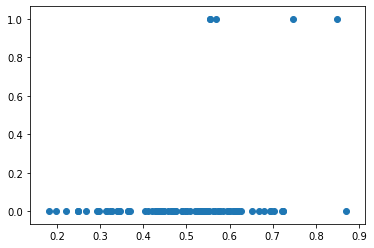

In [66]:
plt.scatter(prob_total_des['totalError'].tolist(), 
            prob_total_des['desistente'].tolist(), 
            marker='o')
plt.show()

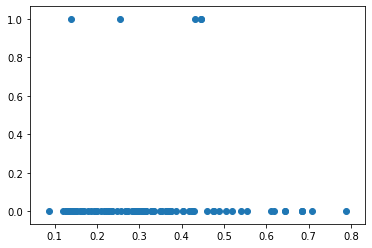

In [68]:
plt.scatter(prob_total_des['acert_100'].tolist(), 
            prob_total_des['desistente'].tolist(), 
            marker='o')
plt.show()

In [79]:
df_cont_subm = df_without_duplicates.groupby(['user_id','listQuestions_id','question_id'])['hitPercentage'].count().reset_index(name='total_subm')
df_cont_subm = df_cont_subm.groupby(['user_id'])['total_subm'].sum()

a = df_without_duplicates.drop(['_id', 'hitPercentage', 'listQuestions_id'], axis=1).drop_duplicates()
qtd_qPa = a.groupby(['user_id'])['question_id'].count().reset_index(name='totalQuest')

media_des0 = pd.merge(df_cont_subm, qtd_qPa, on=['user_id'])
media_des0['subm/quest'] = media_des0['total_subm'] / media_des0['totalQuest']
media_des = pd.merge(media_des0, des, on=['user_id'])
media_des

,user_id,total_subm,totalQuest,subm/quest,ateLista,desistente
0,00ef5626-f029-49e8-aa27-1839357a55c0,63,15,4.200000,1,1
1,0343690d-9edd-48cf-be09-6dc1f4b3f61c,501,120,4.175000,15,0
2,035bbeb6-140b-413c-826d-9f92e36a31ae,433,124,3.491935,15,0
3,04a9f776-feee-4b63-8127-50270693e39f,318,124,2.564516,15,0
4,05c35721-051a-43fa-96b7-aeec0d0eafb5,914,119,7.680672,15,0
...,...,...,...,...,...,...
85,e8af96e7-0bac-45ff-a498-f22acb1af407,703,124,5.669355,15,0
86,ed3e0097-1441-41df-9e12-671039749c8e,37,16,2.312500,2,1
87,f4e5c666-288b-4bbf-951b-56fd0fbb7f9f,363,124,2.927419,15,0
88,f5874924-7ed6-421c-ac14-3c0bccf51c24,184,86,2.139535,15,0


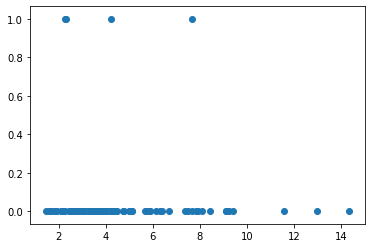

In [75]:
plt.scatter(media_des['subm/quest'].tolist(), 
            media_des['desistente'].tolist(), 
            marker='o')
plt.show()

In [84]:
prob_total_des
ind = prob_total_des.copy()
ind = ind.drop(['ateLista', 'class_id', 'total_subm'], axis=1)
ind = pd.merge(ind, media_des0, on=['user_id'])
ind['teste'] = ind['subm/quest'] * ind['totalAcert']
ind

,user_id,desistente,totalError,totalAcert,acert_100,total_subm,totalQuest,subm/quest,teste
0,337cb03d-871a-4e38-8ab1-f79f8a0d8807,0,0.703549,0.296451,0.128740,1437,124,11.588710,3.435484
1,ab916ff5-180e-401f-a1ff-de548e2d584d,0,0.617631,0.382369,0.086468,1781,124,14.362903,5.491935
2,dc04e57b-43e7-448a-8f4c-1b29fc696a8e,0,0.490085,0.509915,0.311615,353,109,3.238532,1.651376
3,716464a3-83d7-41f6-afcd-bd5a77644c7f,0,0.542587,0.457413,0.309148,634,124,5.112903,2.338710
4,00ef5626-f029-49e8-aa27-1839357a55c0,1,0.746032,0.253968,0.253968,63,15,4.200000,1.066667
...,...,...,...,...,...,...,...,...,...
90,1afdd554-892d-4746-81ab-76809311b711,0,0.721878,0.278122,0.139947,1129,124,9.104839,2.532258
91,f4e5c666-288b-4bbf-951b-56fd0fbb7f9f,0,0.363636,0.636364,0.352617,363,124,2.927419,1.862903
92,bbf405b0-63d5-4031-9e5c-f4914a92c1dc,0,0.221649,0.778351,0.644330,194,124,1.564516,1.217742
93,81c20d34-5d22-472d-8aac-7a215ce8296a,0,0.292035,0.707965,0.539823,226,123,1.837398,1.300813


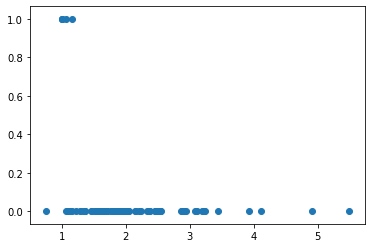

In [85]:
plt.scatter(ind['teste'].tolist(), 
            ind['desistente'].tolist(), 
            marker='o')
plt.show()

In [91]:
test_des = ind[ind['desistente']==1]
test_ndes = ind[ind['desistente']==0]

newind = ind[ind['teste']<=test_des['teste'].max()]
newind

,user_id,desistente,totalError,totalAcert,acert_100,total_subm,totalQuest,subm/quest,teste,teste2
4,00ef5626-f029-49e8-aa27-1839357a55c0,1,0.746032,0.253968,0.253968,63,15,4.200000,1.066667,0.270899
28,c206e495-e2a7-4fad-8cc1-eed9690dc6dc,0,0.869565,0.130435,0.130435,23,4,5.750000,0.750000,0.097826
34,da131b91-0126-41ca-9e6e-17dad2104ffd,1,0.849593,0.150407,0.138211,246,32,7.687500,1.156250,0.159807
35,4f381a38-98c4-404b-b386-4cdda6a06565,0,0.196629,0.803371,0.707865,178,124,1.435484,1.153226,0.816328
63,1eb39a33-8898-4a33-a978-b1db76e94c88,0,0.403846,0.596154,0.519231,52,29,1.793103,1.068966,0.555040
80,82109970-6be9-42da-ad03-a96f1fcb194a,0,0.411017,0.588983,0.555085,236,124,1.903226,1.120968,0.622232
84,174b3116-31b8-4f19-bf06-2b597f96cc8a,0,0.344660,0.655340,0.611650,206,124,1.661290,1.088710,0.665910
86,ed3e0097-1441-41df-9e12-671039749c8e,1,0.567568,0.432432,0.432432,37,16,2.312500,1.000000,0.432432
88,0d327166-a647-4fa2-8def-1a64f55b223c,1,0.555556,0.444444,0.444444,9,4,2.250000,1.000000,0.444444
89,0d327166-a647-4fa2-8def-1a64f55b223c,1,0.555556,0.444444,0.444444,9,4,2.250000,1.000000,0.444444


In [92]:
newind['teste2'] = ind['teste'] * ind['acert_100']
newind

,user_id,desistente,totalError,totalAcert,acert_100,total_subm,totalQuest,subm/quest,teste,teste2
4,00ef5626-f029-49e8-aa27-1839357a55c0,1,0.746032,0.253968,0.253968,63,15,4.200000,1.066667,0.270899
28,c206e495-e2a7-4fad-8cc1-eed9690dc6dc,0,0.869565,0.130435,0.130435,23,4,5.750000,0.750000,0.097826
34,da131b91-0126-41ca-9e6e-17dad2104ffd,1,0.849593,0.150407,0.138211,246,32,7.687500,1.156250,0.159807
35,4f381a38-98c4-404b-b386-4cdda6a06565,0,0.196629,0.803371,0.707865,178,124,1.435484,1.153226,0.816328
63,1eb39a33-8898-4a33-a978-b1db76e94c88,0,0.403846,0.596154,0.519231,52,29,1.793103,1.068966,0.555040
80,82109970-6be9-42da-ad03-a96f1fcb194a,0,0.411017,0.588983,0.555085,236,124,1.903226,1.120968,0.622232
84,174b3116-31b8-4f19-bf06-2b597f96cc8a,0,0.344660,0.655340,0.611650,206,124,1.661290,1.088710,0.665910
86,ed3e0097-1441-41df-9e12-671039749c8e,1,0.567568,0.432432,0.432432,37,16,2.312500,1.000000,0.432432
88,0d327166-a647-4fa2-8def-1a64f55b223c,1,0.555556,0.444444,0.444444,9,4,2.250000,1.000000,0.444444
89,0d327166-a647-4fa2-8def-1a64f55b223c,1,0.555556,0.444444,0.444444,9,4,2.250000,1.000000,0.444444


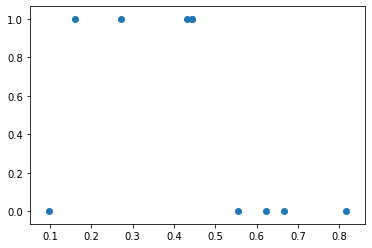

In [93]:
plt.scatter(newind['teste2'].tolist(), 
            newind['desistente'].tolist(), 
            marker='o')
plt.show()

In [96]:
usersQtdAte[usersQtdAte['user_id']=='c206e495-e2a7-4fad-8cc1-eed9690dc6dc']

,user_id,class_id,medialist,aprovado,qtdLista,ateLista
73,c206e495-e2a7-4fad-8cc1-eed9690dc6dc,8394d1cb-86b5-4b90-bc62-4b9b192a81f6,2.4,0,1,15
